# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
get_ipython().magic('matplotlib inline')

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print("Dataset has {} rows, {} columns".format(*data.shape))
print(data.head())  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

**Answer: When performing PCA, its expected that the first dimension will best describe the variance, made up of the features fresh, milk, and grocery. For ICA, I believe that we will get six independent components in a 6x6 matrix. I wouldn't think that detergents_paper and delicatessen would have a strong positive correlation. Meaning that this would show in an ICS dimension.**

###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


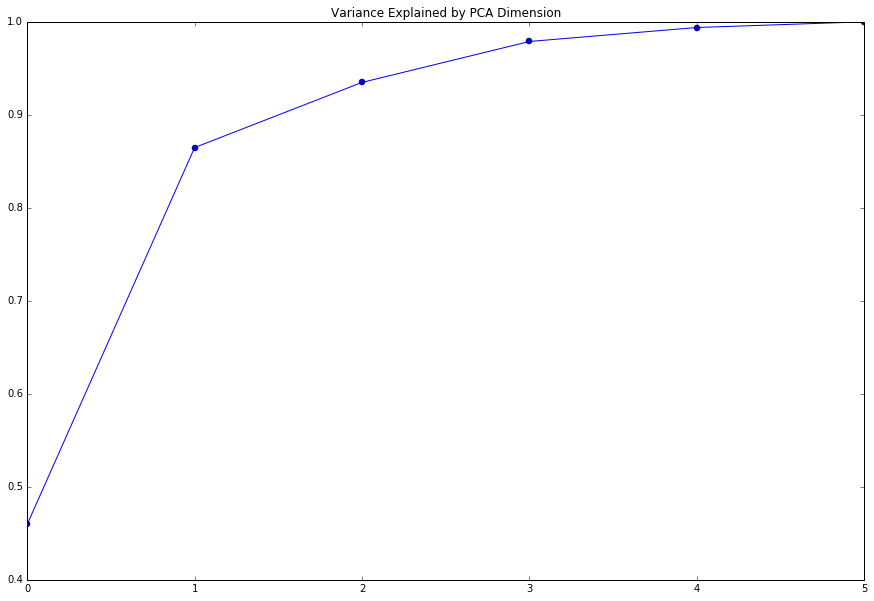

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print(pca.components_)
print(pca.explained_variance_ratio_)
x = np.arange(6)
plt.figure(figsize=(15,10))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')
plt.title('Variance Explained by PCA Dimension')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer: Variance has a slight drop from the first principle component to the second. Then there is a precipitous drop off between the second and third. The first two principle components has about 86% of the variance, so I would choose those two for my analysis.** 

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer: The first component seems to be mostly comprised of the features fresh, milk, and frozen. The second consist of mainly grocery, milk, and detergents_paper. With this information I would recommend to the business to focus more on the the products that belong to the first two componets because they capture much of the information in the dataset.** 

###ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

centered_data = data.copy()
centered_data -= centered_data.mean()
centered_data /= centered_data.std()
ica = FastICA(n_components=6, random_state=42)
ica.fit(centered_data)

# Print the independent components
icaDF = pd.DataFrame(ica.components_, columns=data.columns)

icaDF


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.010921,-0.001087,0.007316,0.054117,-0.002544,-0.016776
1,0.002541,-0.012342,0.069207,0.001425,-0.013764,-0.005447
2,-0.004912,-0.001541,-0.005628,-0.002528,0.002387,0.050987
3,-0.003367,0.018651,0.109114,-0.007241,-0.133538,-0.016041
4,-0.050324,0.006479,0.007491,0.003228,-0.011484,0.002711
5,-0.001941,-0.072537,0.056541,0.001676,-0.017160,0.016975


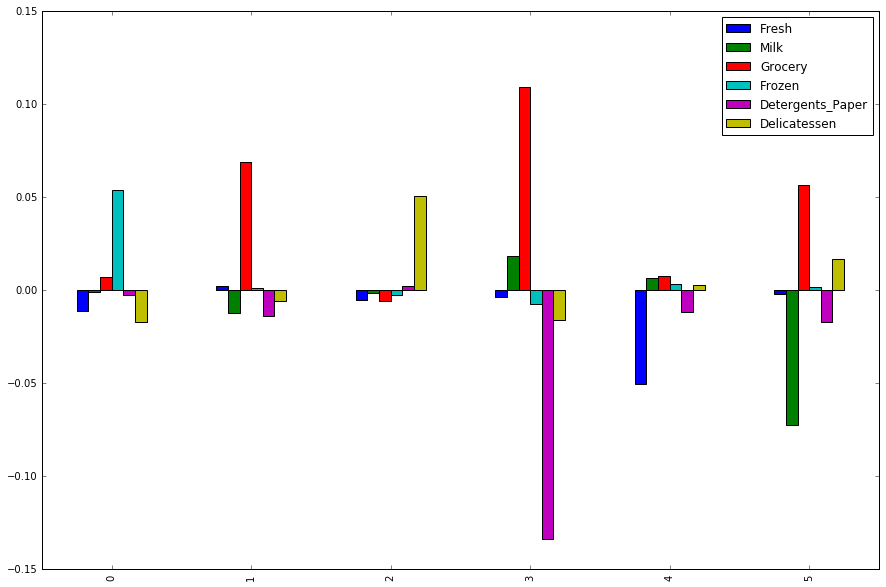

In [4]:
icaDF.plot(kind='bar', figsize=(15,10))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

**Answer: ICA's goal is to find data that is statistically independent of one another. By focusing on the higher coefficients, we can gauge the customer's product purchases from different feature groups. In ICA the positive and negative signs do matter, as they are considered inversely associated with each other. If two coefficients of a component are of the same sign, it can be implied that the sales trend together. Conversely, if they are opposite, it's an indication that customers who buy more of one group buys less from the other group. We can use this information to help increase sells by employing marketing strategies such as discounts or bundles. For example discounts can be placed on items that are opposite of one another.**

**Component 1: This component consist mainly of 'Frozen' with an opposite correlation of'Fresh' and 'Delicatessen.'  This may be supermarkets that only sell frozen food products.**

**Component 2: Is predominantly 'Grocery' with some 'Milk' and 'Detergents_Paper.' These will most likely be grocery stores.**

**Component 3: Is mostly comprised of 'Delicatessen' and very little of the other features. This quite possibly can be sandwich, subs, or deli shops**

**Component 4: 'Grocery' and 'Detergents_Paper' are very high in this component, but are of opposite signs. This will be your grocery store and pharmacies which carry some food but far more paper products. **

**Component 5: Since 'Fresh' dominates this components. I believe that this would lean towards farmer markets.**

**Component 6: 'Milk' and 'Grocery' dominates here and are of opposite signs with a little from 'Detergents_Paper' and 'Delicatessen' being there too. This could be shops that focus more on selling dairy products, such as frozen deserts.**

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

**Answer: The advantages of K-Means are with a large number of variables, K-Means may be computationally
faster than hierarchical clustering (if K is small). Also K-Means may produce tighter clusters than hierarchical
clustering, especially if the clusters are globular. K-Means treats each observation in your data as an object having a location in space. It finds a partition in which objects within each cluster are as close to each other as possible, and as far from objects in other clusters as possible. You can choose from five different distance measures, depending on the kind of data you are clustering.** 

** Gaussian Mixture Models is also an generalization of K-Means clustering that takes into account the covariance of the data. It is very fast, and it does not presume the data has a specific structure that may in fact not be applicable. GMM clustering is more flexible because you can view it as a fuzzy or soft clustering method. Soft clustering methods assign a score to a data point for each cluster. The value of the score indicates the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible in that they can assign a data point to more than one cluster. When clustering with GMMs, the score is the posterior probability. Although **

** GMM is the best choice for this algorithm, due to the fact that it presumes less about the data compared to K-Means.**

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [6]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(centered_data)

print(reduced_data[:10])  # print upto 10 elements

[[-0.19307077  0.30475306]
 [-0.43392596  0.32803921]
 [-0.81022096 -0.81416893]
 [ 0.7777625  -0.65201155]
 [-0.16609819 -1.26998809]
 [ 0.15599237  0.29480541]
 [ 0.33490718  0.52440632]
 [-0.14042659  0.23073005]
 [ 0.51673134  0.65861312]
 [-1.59029884  0.74016879]]


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GMM(n_components=n_components, covariance_type=cv_type, random_state=42)
        gmm.fit(reduced_data)
        this_bic = gmm.bic(reduced_data)
        if this_bic < lowest_bic:
            lowest_bic, clusters = this_bic, gmm

print (clusters.fit(reduced_data))

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=7, n_init=1, n_iter=100, params='wmc', random_state=42,
  thresh=None, tol=0.001, verbose=0)


In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print (centroids)

[[ 0.64749163 -0.66936696]
 [-1.83759249  1.00695221]
 [-0.20301949  0.50241295]
 [-4.49414238 -7.81453853]
 [-7.32731311  1.05996333]
 [ 1.01692769  0.24619224]
 [-0.33098977 -1.70169373]]


In [10]:
# identify which customers are in which cluster
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
rows = ['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5', 'Cluster 6']
x = data['Cluster'] = clusters.predict(reduced_data)
clusterList = []

# print cluster sample counts and averages
for i in range(clusters.n_components):
    count = str(data[x==i].shape[0])
    clusterList.append(list(data[x==i][list(data.columns[:-1])].mean()))
    
clusterDF = pd.DataFrame(clusterList, columns=columns, index=rows)
clusterDF['# of Samples'] = [88,47,107,4,9,161,24]
clusterDF

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,# of Samples
Cluster 0,20403.727273,3436.931818,3863.431818,5350.238636,638.056818,1639.011364,88
Cluster 1,4533.808511,12631.680851,21364.276596,1238.553191,9677.659574,1413.319149,47
Cluster 2,7397.859813,6659.168224,9825.168224,1264.747664,3837.504673,1284.130841,107
Cluster 3,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000,4
Cluster 4,17283.444444,35243.666667,50944.777778,3103.333333,25668.000000,3120.888889,9
Cluster 5,8490.223602,1772.751553,2309.465839,1979.813665,430.900621,672.745342,161
Cluster 6,31224.083333,8845.708333,8286.500000,9221.125000,1460.916667,4494.041667,24


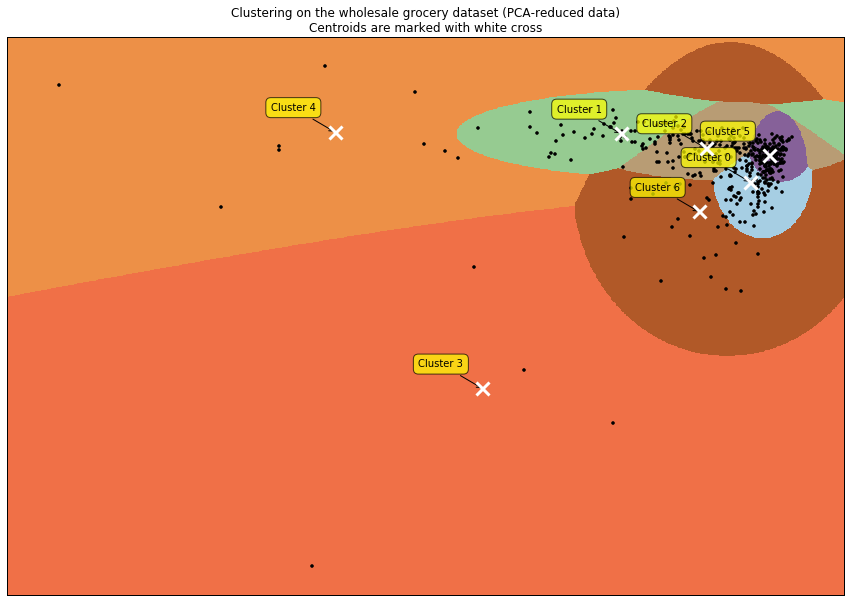

In [11]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
numSamp = [('Cluster %s' % i) for i in range(clusters.n_components)]
plt.figure(1, figsize=(15,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=6)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')

for label, x, y in zip(numSamp, centroids[:, 0], centroids[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.7),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

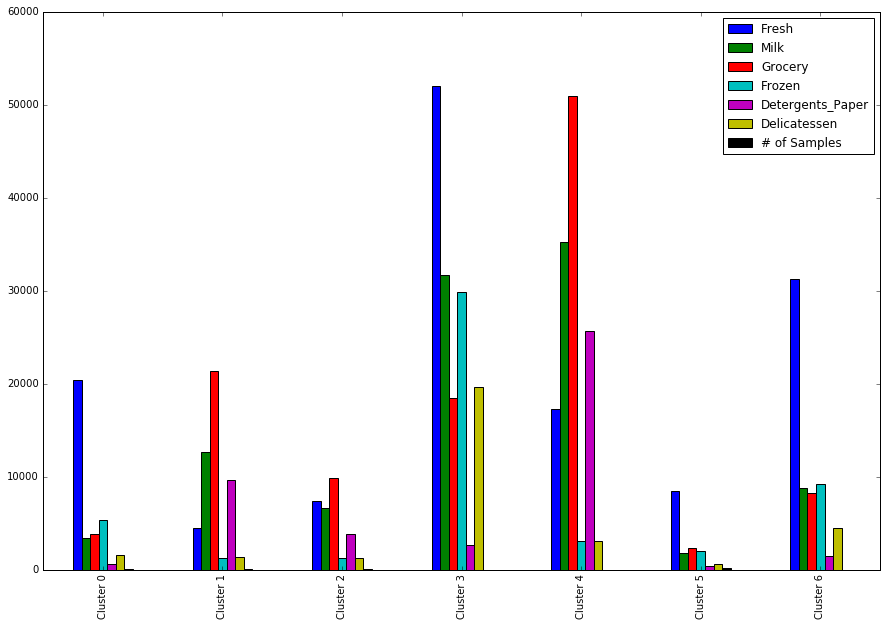

In [12]:
clusterDF.plot(kind = 'bar', figsize=(15,10))

**7)** What are the central objects in each cluster? Describe them as customers.

**Answer: In the diagram, the central objects in each cluster represents the average customer in that cluster. Two additional visual aids were are given to help better understand the clusters and what each cluster may represent. In the bar graph, I can see that there are similarities with certain clusters. Cluster 0, 3, 5, and 6 look very similar. With the exception to cluster 3, which seems to engulf the whole diagram, appears to have the same egg-shape with different sizes. This may indicate that these customers or stores are of similar types but some are bigger stores than others. Cluster 0, 3, 5, and 6 may be a combination of farmer markets, restaurants, schools, prisons, delis, etc. Cluster 1, 2, and 4 seem to be very similar to each other. I believe these may be your grocery stores, convience stores, corner markets, etc. 

**Cluster 0: Fresh dominates this cluster. Although other products, they can be considered a very small amount compared to fresh.**

**Cluster 1: Grocery, milk, and detergents_paper items are the top purchased products for this cluster.**

**Cluster 2: The customer purchases in this cluster are relatively even, with grocery being purchased the most followed by fresh and milk. **

**Cluster 3: With the exception of detergents_papers, this cluster purchases a large amount of all the products, mainly fresh, milk, and frozen.**

**Cluster 4: Grocery is the main product that is purchased in this cluster. There are also large amount of purchases of milk, detergents_paper, and fresh.**

**Cluster 5: Has a very small amount of fresh product purchases and very little purchases of the other products.**

**Cluster 6: Is predominately made of fresh purchases with about an even amount of purchases between milk, grocery, and frozen products.**

**Although there are seven clusters, with the similarities that were presented, there may be actually just two clusters.**

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

**Answer: I felt that the Principle Component Analysis (PCA) gave me the most insight into the data. PCA helped by determining the components with the highest amount of variance. Although the dataset wasn't large, reducing the dimensionality of the data helped with clustering. PCA combined with Gaussian Mixture Model (GMM) let us group the customers into their respective segments. ** 

**9)** How would you use that technique to help the company design new experiments?

**Answer: Now that different groups have been created we can, different experiments can be conducted. Since the original issue was the evening bundled delivery service, we can test how well a morning bundled delivery service can perform against it. Half of a single cluster could start receiving the evening service, while the other half would get the morning delivery service. Once enough time has passed, the performance can be compared as it relates to customer satisfaction and business sales. The information gained could be used on determining which would be more profitable and keep customers happy..** 

**10)** How would you use that data to help you predict future customer needs?

**Answer: By using a regression supervised learning technique, we can see how products are trending and try to predict future sales of products being bought by customers. With this information marketing teams can get ahead of the curve and come up with creative ways to maximize this information as well as producing what customer needs. Features such as average purchase a product by month, by season, or any type of data over a period of time to see what changes occur in product purchases.**

** Also now that we can place labels on we can predict what cluster a future customer may fall under and trry to estimate that customers needs, in terms of what products they may purchase and how much. **